In [1]:
import numpy as np
import xarray as xr
import glob
import matplotlib
import matplotlib.pyplot as plt
import cftime
import dask
import os
import statsmodels.api as sm
from scipy import stats
from sklearn import linear_model
%matplotlib inline

In [2]:
# colorbrewer colormap, diverging, brown->green
ccc = np.zeros([11,3]);
ccc[0,:] = 84,48,5
ccc[1,:] = 140,81,10
ccc[2,:] = 191,129,45
ccc[3,:] = 223,194,125
ccc[4,:] = 246,232,195
ccc[5,:] = 245,245,245
ccc[6,:] = 199,234,229
ccc[7,:] = 128,205,193
ccc[8,:] = 53,151,143
ccc[9,:] = 1,102,94
ccc[10,:] = 0,60,48
ccc = matplotlib.colors.ListedColormap(ccc/256)

In [14]:
def month_wts(nyears):
    days_pm  = [31,28,31,30,31,30,31,31,30,31,30,31]
    return xr.DataArray(np.tile(days_pm,nyears),dims='time')

In [3]:
thedir = '/glade/scratch/djk2120/clm5ppe/ens002/histSTEP3/'
thefiles = sorted(glob.glob(thedir+'*.h0.*'))
ds1 = xr.open_mfdataset(thefiles,combine='nested',concat_dim='ens')

In [10]:
thedir = '/glade/scratch/djk2120/clm5ppe/ens002/histSTEP4/'
thefiles = sorted(glob.glob(thedir+'*.h0.*'))
ds2 = xr.open_mfdataset(thefiles,combine='nested',concat_dim='ens')

In [15]:
thedir = '/glade/scratch/djk2120/clm5ppe/ens002/hist/'
thefiles = sorted(glob.glob(thedir+'*.h0.*'))
ds3 = xr.open_mfdataset(thefiles,combine='nested',concat_dim='ens')

nmonths = len(ds3.time)
yr0 = ds3['time.year'][0].values
ds3['time'] =xr.cftime_range(str(yr0),periods=nmonths,freq='MS')

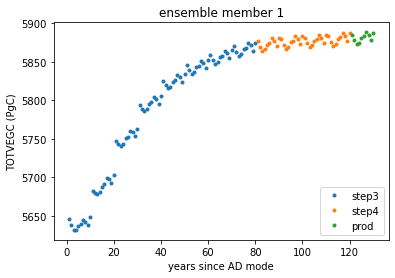

In [18]:
ix = ds1['time.year']>1
tvc1 = ds1.TOTVEGC.sel(ens=0).isel(time=ix).mean(dim='gridcell')
ix = ds2['time.year']>1
tvc2 = ds2.TOTVEGC.sel(ens=0).isel(time=ix).mean(dim='gridcell')
mwts = month_wts(10)/365
tvc3 = (mwts*ds3.TOTVEGC.sel(ens=0)).groupby('time.year').sum().mean(dim='gridcell')
plt.plot(1+np.arange(80),tvc1,'.')
plt.plot(81+np.arange(40),tvc2,'.')
plt.plot(121+np.arange(10),tvc3,'.')
plt.legend(['step3','step4','prod'],loc=4)
plt.xlabel('years since AD mode')
plt.ylabel('TOTVEGC (PgC)')
plt.title('ensemble member 1');

In [65]:
gpp=(1e-9*24*60*60*landarea_sp*dpm*ds2.GPP).groupby('time.year').sum().sum(dim='gridcell').mean(dim='year')

In [69]:
thedir = '/glade/scratch/djk2120/clm5ppe/ens001/histSTEP3/'
thefiles = sorted(glob.glob(thedir+'*.h0.*'))
ds = xr.open_mfdataset(thefiles,combine='nested',concat_dim='ens')

In [73]:
ix1 = np.logical_and(ds['time.year']>61,ds['time.year']<=71)
ix2 = np.logical_and(ds['time.year']>71,ds['time.year']<=81)

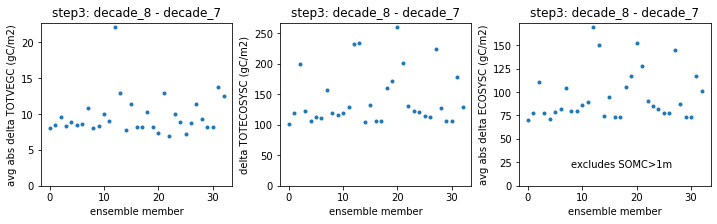

In [113]:
plt.figure(figsize=[12,3])
plt.subplot(131)
dtvc = ds.TOTVEGC.isel(time=ix1).mean(dim='time')-ds.TOTVEGC.isel(time=ix2).mean(dim='time')
dt = abs(dtvc).mean(dim='gridcell')
dt.plot.line('.')
plt.xlabel('ensemble member')
plt.ylabel('avg abs delta TOTVEGC (gC/m2)')
plt.ylim([0,1.025*dt.max()]);
plt.title('step3: decade_8 - decade_7');
plt.subplot(132)
dtec = ds.TOTECOSYSC.isel(time=ix1).mean(dim='time')-ds.TOTECOSYSC.isel(time=ix2).mean(dim='time')
dt = abs(dtec).mean(dim='gridcell')
dt.plot.line('.')
plt.xlabel('ensemble member')
plt.title('step3: decade_8 - decade_7')
plt.ylim([0,1.025*dt.max()]);
plt.ylabel('delta TOTECOSYSC (gC/m2)');
plt.subplot(133)
tec = ds.TOTECOSYSC+ds.TOTSOMC_1m-ds.TOTSOMC
dtec =tec.isel(time=ix1).mean(dim='time')-tec.isel(time=ix2).mean(dim='time')
dt = abs(dtec).mean(dim='gridcell')
dt.plot.line('.')
plt.xlabel('ensemble member')
plt.ylabel('avg abs delta ECOSYSC (gC/m2)')
plt.title('step3: decade_8 - decade_7')
plt.ylim([0,1.025*dt.max()])
plt.text(8,20,'excludes SOMC>1m')
plt.subplots_adjust(wspace=0.25)

In [115]:
thedir = '/glade/scratch/djk2120/clm5ppe/ens001/histSTEP4/'
thefiles = sorted(glob.glob(thedir+'*.h0.*'))
ds = xr.open_mfdataset(thefiles,combine='nested',concat_dim='ens')

In [117]:
ix1 = np.logical_and(ds['time.year']>21,ds['time.year']<=31)
ix2 = np.logical_and(ds['time.year']>31,ds['time.year']<=41)

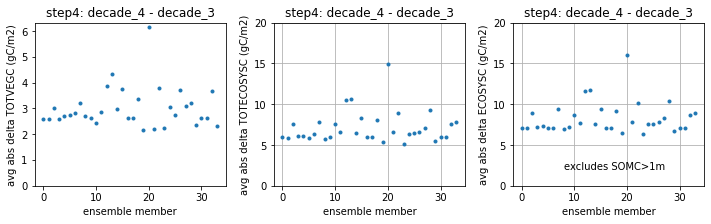

In [125]:
plt.figure(figsize=[12,3])
plt.subplot(131)
dtvc = ds.TOTVEGC.isel(time=ix1).mean(dim='time')-ds.TOTVEGC.isel(time=ix2).mean(dim='time')
dt = abs(dtvc).mean(dim='gridcell')
dt.plot.line('.')
plt.xlabel('ensemble member')
plt.ylabel('avg abs delta TOTVEGC (gC/m2)')
plt.ylim([0,1.025*dt.max()]);
plt.title('step4: decade_4 - decade_3')
plt.subplot(132)
dtec = ds.TOTECOSYSC.isel(time=ix1).mean(dim='time')-ds.TOTECOSYSC.isel(time=ix2).mean(dim='time')
dt = abs(dtec).mean(dim='gridcell')
dt.plot.line('.')
plt.xlabel('ensemble member')
plt.title('step4: decade_4 - decade_3')
plt.ylim([0,20]);
plt.yticks(5*np.arange(5))
plt.ylabel('avg abs delta TOTECOSYSC (gC/m2)');
plt.grid()
plt.subplot(133)
tec = ds.TOTECOSYSC+ds.TOTSOMC_1m-ds.TOTSOMC
dtec =tec.isel(time=ix1).mean(dim='time')-tec.isel(time=ix2).mean(dim='time')
dt = abs(dtec).mean(dim='gridcell')
dt.plot.line('.')
plt.xlabel('ensemble member')
plt.ylabel('avg abs delta ECOSYSC (gC/m2)')
plt.title('step4: decade_4 - decade_3')
plt.ylim([0,20])
plt.yticks(5*np.arange(5))
plt.grid()
plt.text(8,2,'excludes SOMC>1m')
plt.subplots_adjust(wspace=0.25)

In [130]:
vc = ds.TOTVEGC.isel(time=ix2).mean(dim='time')-ds.TOTVEGC.isel(time=ix1).mean(dim='time')

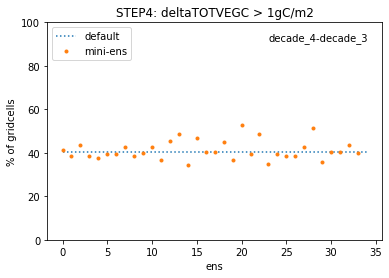

In [172]:
plt.plot([0,34],[vcbc_eq,vcbc_eq],':')
((abs(vc)>1).sum(dim='gridcell')/4).plot.line('.')
plt.ylabel('% of gridcells')
plt.title('STEP4: deltaTOTVEGC > 1gC/m2')
plt.ylim([0,100])
plt.text(23,92,'decade_4-decade_3');
plt.legend(['default','mini-ens'],loc=2)

(-50.0, 50.0)

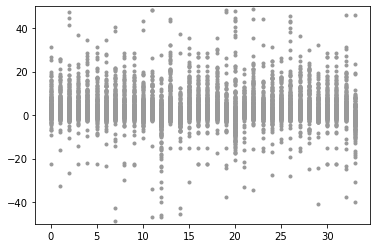

In [171]:
dtvc = ds.TOTVEGC.isel(time=40)-ds.TOTVEGC.isel(time=30)
plt.plot(dtvc,'.',color=[0.6,0.6,0.6]);
plt.ylim([-50,50])

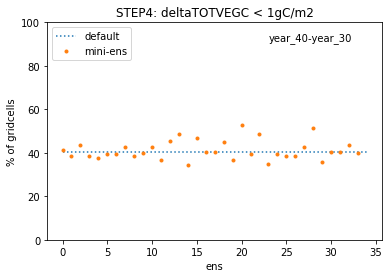

In [168]:
vc = ds.TOTVEGC.isel(time=40)-ds.TOTVEGC.isel(time=30)
vcbc = bc.TOTVEGC.isel(time=40)-bc.TOTVEGC.isel(time=30)
vcbc_eq = ((abs(vcbc)>1).sum(dim='gridcell')/4).values
plt.plot([0,34],[vcbc_eq,vcbc_eq],':')
((abs(vc)>1).sum(dim='gridcell')/4).plot.line('.')
plt.ylabel('% of gridcells')
plt.title('STEP4: deltaTOTVEGC < 1gC/m2')
plt.ylim([0,100])
plt.text(23,92,'year_40-year_30');
plt.legend(['default','mini-ens'],loc=2)

In [147]:
thedir = '/glade/scratch/djk2120/ctsm51c6_PPEn07ctsm51d023_2deg_GSWP3V1_Sparse400_2000_step4/run/'
file = glob.glob(thedir+'*.h0.*')[0]
bc = xr.open_dataset(file)

In [152]:
vcbc = bc.TOTVEGC.isel(time=ix2).mean(dim='time')-bc.TOTVEGC.isel(time=ix1).mean(dim='time')
vcbc_eq = ((abs(vcbc)>1).sum(dim='gridcell')/4).values

In [173]:
thedir = '/glade/scratch/djk2120/clm5ppe/ens001/hist/'
thefiles = sorted(glob.glob(thedir+'*.h0.*'))

In [181]:
mwts = month_wts(10)

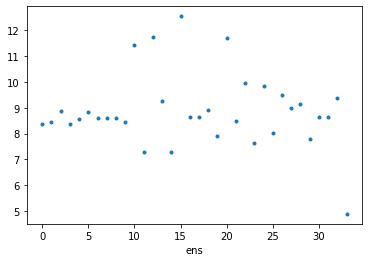

In [201]:
xprod  = (mwts/3650*dsprod.TOTVEGC).sum(dim='time')
ix = ds['time.year']>31
xstep4 = ds.TOTVEGC.isel(time=ix).mean(dim='time')
vc = xprod-xstep4
abs(vc).mean(dim='gridcell').plot.line('.')

In [208]:
thedir = '/glade/scratch/djk2120/clm5ppe/ens001/histSTEP3/'
thefiles = sorted(glob.glob(thedir+'*.h0.*'))
ds1 = xr.open_mfdataset(thefiles,combine='nested',concat_dim='ens')

In [204]:
thedir = '/glade/scratch/djk2120/clm5ppe/ens001/histSTEP4/'
thefiles = sorted(glob.glob(thedir+'*.h0.*'))
ds2 = xr.open_mfdataset(thefiles,combine='nested',concat_dim='ens')

In [205]:
thedir = '/glade/scratch/djk2120/clm5ppe/ens001/hist_firsttime/'
thefiles = sorted(glob.glob(thedir+'*.h0.*'))
ds3 = xr.open_mfdataset(thefiles,combine='nested',concat_dim='ens')
nmonths = len(ds3.time)
yr0 = ds3['time.year'][0].values
ds3['time'] =xr.cftime_range(str(yr0),periods=nmonths,freq='MS')

In [260]:
thedir = '/glade/scratch/djk2120/clm5ppe/ens001/hist/'
thefiles = sorted(glob.glob(thedir+'*.h0.*'))
ds4 = xr.open_mfdataset(thefiles,combine='nested',concat_dim='ens')
nmonths = len(ds4.time)
yr0 = ds4['time.year'][0].values
ds4['time'] =xr.cftime_range(str(yr0),periods=nmonths,freq='MS')

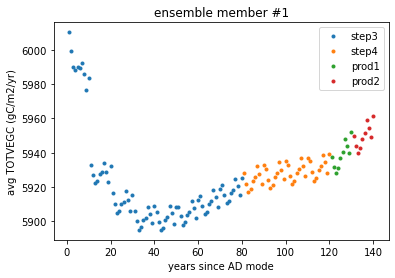

In [261]:
ix = ds1['time.year']>1
tvc1 = ds1.TOTVEGC.sel(ens=0).mean(dim='gridcell').isel(time=ix)
ix = ds2['time.year']>1
tvc2 = ds2.TOTVEGC.sel(ens=0).mean(dim='gridcell').isel(time=ix)
mwts = month_wts(10)/365
tvc3 = (mwts*ds3.TOTVEGC.sel(ens=0)).groupby('time.year').sum().mean(dim='gridcell')
tvc4 = (mwts*ds4.TOTVEGC.sel(ens=0)).groupby('time.year').sum().mean(dim='gridcell')
plt.plot(1+np.arange(80),tvc1,'.')
plt.plot(81+np.arange(40),tvc2,'.')
plt.plot(121+np.arange(10),tvc3,'.');
plt.plot(131+np.arange(10),tvc4,'.');
plt.legend(['step3','step4','prod1','prod2'])
plt.ylabel('avg TOTVEGC (gC/m2/yr)')
plt.xlabel('years since AD mode')
plt.title('ensemble member #1');

Text(0.5, 1.0, 'ensemble member #1')

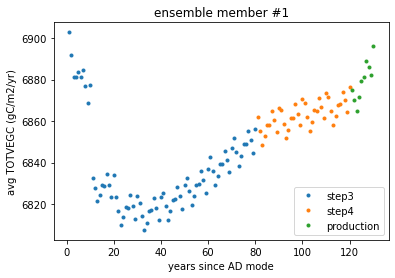

In [239]:
ee=15
ix = ds1['time.year']>1
tvc1 = ds1.TOTVEGC.sel(ens=ee).mean(dim='gridcell').isel(time=ix)
ix = ds2['time.year']>1
tvc2 = ds2.TOTVEGC.sel(ens=ee).mean(dim='gridcell').isel(time=ix)
mwts = month_wts(10)/365
tvc3 = (mwts*ds3.TOTVEGC.sel(ens=ee)).groupby('time.year').sum().mean(dim='gridcell')
plt.plot(1+np.arange(80),tvc1,'.')
plt.plot(81+np.arange(40),tvc2,'.')
plt.plot(121+np.arange(10),tvc3,'.');
plt.legend(['step3','step4','production'])
plt.ylabel('avg TOTVEGC (gC/m2/yr)')
plt.xlabel('years since AD mode')
plt.title('ensemble member #1')

In [2]:
thedir = '/glade/scratch/djk2120/ctsm51c6_PPEn07ctsm51d023_2deg_GSWP3V1_Sparse400_2000_step3/run/'
thefile = glob.glob(thedir+'*.h0.0001*')[0]
bc1 = xr.open_dataset(thefile)
thedir = '/glade/scratch/djk2120/ctsm51c6_PPEn07ctsm51d023_2deg_GSWP3V1_Sparse400_2000_step4/run/'
thefile = glob.glob(thedir+'*.h0.*')[0]
bc2 = xr.open_dataset(thefile)
thedir = '/glade/scratch/djk2120/ctsm51c6_PPEn07ctsm51d023_2deg_GSWP3V1_Sparse400_2000/run/'
thefile = glob.glob(thedir+'*.h0.*')[0]
bc3 = xr.open_dataset(thefile)
nmonths = len(bc3.time)
yr0 = bc3['time.year'][0].values
bc3['time'] =xr.cftime_range(str(yr0),periods=nmonths,freq='MS')

In [39]:
la = np.zeros([400])
k = -1
for i,j in zip(bc1['grid1d_ixy'].values,bc1['grid1d_jxy'].values):
    i = int(i)-1
    j = int(j)-1
    k +=1
    la[k] = bc1['area'][j,i]*bc1['landfrac'][j,i]

In [40]:
lasum = la.sum()

In [44]:
ix1 = np.logical_and(bc2['time.year']>21,bc2['time.year']<=31)
ix2 = np.logical_and(bc2['time.year']>31,bc2['time.year']<=41)
tvc1 = bc2.TOTVEGC.isel(time=ix1).mean(dim='time')
tvc2 = bc2.TOTVEGC.isel(time=ix2).mean(dim='time')
dtvc = (tvc2-tvc1)/10
ixg  = dtvc>1
la[ixg].sum()/lasum

In [49]:
ix1 = np.logical_and(bc2['time.year']>21,bc2['time.year']<=31)
ix2 = np.logical_and(bc2['time.year']>31,bc2['time.year']<=41)
tvc1 = bc2.TOTECOSYSC.isel(time=ix1).mean(dim='time')
tvc2 = bc2.TOTECOSYSC.isel(time=ix2).mean(dim='time')
dtvc = (tvc2-tvc1)/10
ixg  = dtvc>1
la[ixg].sum()/lasum


0.12562697584364307

In [48]:
la[ixg].sum()/lasum

0.04273022385603257

Text(0.5, 1.0, 'default case')

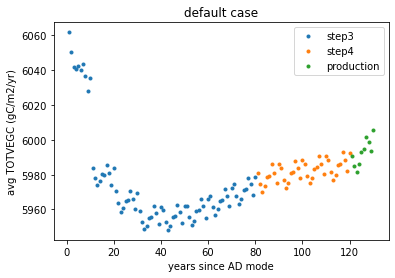

In [259]:
ix = ds1['time.year']>1
tvc1 = bc1.TOTVEGC.mean(dim='gridcell').isel(time=ix)
ix = ds2['time.year']>1
tvc2 = bc2.TOTVEGC.mean(dim='gridcell').isel(time=ix)
mwts = month_wts(10)/365
tvc3 = (mwts*bc3.TOTVEGC).groupby('time.year').sum().mean(dim='gridcell')
plt.plot(1+np.arange(80),tvc1,'.')
plt.plot(81+np.arange(40),tvc2,'.')
plt.plot(121+np.arange(10),tvc3,'.');
plt.legend(['step3','step4','production'])
plt.ylabel('avg TOTVEGC (gC/m2/yr)')
plt.xlabel('years since AD mode')
plt.title('default case')